# Spam Mail Prediction Project 

In this project we will be working with a mail data set, indicating whether a perticular message in our mail is a ham or a spam.
We will try to create a model that will predict whether the message is a ham or a spam based off the messages of our mail.

In our mail data set:
*  The first column is a Category saying whether the given message is a normal message (commonly known as "ham") or "spam".
*  The second column is the message itself.

## Import Libraries

**Importing required libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

## Get the Data
**Reading the mail_data.csv file and set it to a data frame called mail_data.**

In [2]:
mail_data=pd.read_csv('mail_data.csv')

**Checking the head of sonar_data.**

In [3]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

**Using info() and describe() on sonar_data.**

In [4]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


**Using groupby to use describe by Category.**

In [6]:
mail_data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

**Making a new column to detect how long the text messages are**

In [7]:
mail_data['length']=mail_data['Message'].apply(len)
mail_data.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
mail_data['length'].describe()

count    5572.000000
mean       80.368988
std        59.926946
min         2.000000
25%        35.750000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

**Using groupby to use describe by length on the basis of Category.**

In [9]:
mail_data.groupby('Category')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ham,4825.0,71.44829,58.434864,2.0,33.0,52.0,93.0,910.0
spam,747.0,137.98929,29.980287,7.0,132.0,149.0,157.0,223.0


## Data Visualization

<AxesSubplot:xlabel='length', ylabel='Count'>

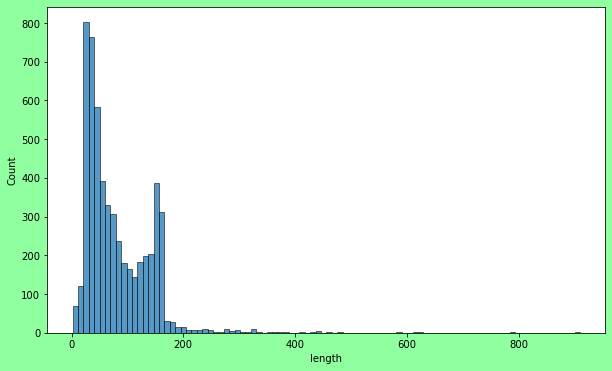

In [10]:
fig=plt.figure(figsize=(10,6))
fig.patch.set_facecolor('xkcd:mint green')
sns.histplot(x='length',data=mail_data)

<AxesSubplot:xlabel='length', ylabel='Count'>

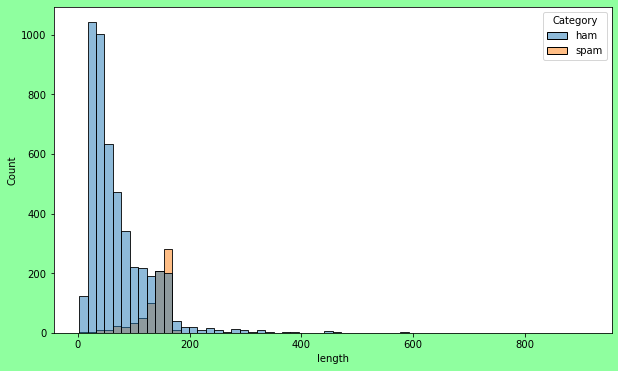

In [11]:
fig=plt.figure(figsize=(10,6))
fig.patch.set_facecolor('xkcd:mint green')
sns.histplot(x='length',data=mail_data,hue='Category',bins=60)

**From the above plot we've been able to discover a trend that spam messages tend to have more characters.**

## Text Pre-processing through Data Pipeline

**Importing required libraries**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Training a Model

**Splitting the data into training set and testing set using train_test_split.**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
msg_train, msg_test, category_train, category_test = train_test_split(mail_data['Message'], mail_data['Category'], test_size=0.33, random_state=61)

**Fitting the pipeline to the training data.**

In [15]:
pipeline.fit(msg_train,category_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

## Predictions and Evaluations

**Predicting the Category for the testing data.**

In [16]:
predictions=pipeline.predict(msg_test)

**Creating a confusion matrix and classification report to see how well the model works.**

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print(confusion_matrix(category_test,predictions))

[[1598    0]
 [  76  165]]


In [19]:
print(classification_report(category_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1598
        spam       1.00      0.68      0.81       241

    accuracy                           0.96      1839
   macro avg       0.98      0.84      0.89      1839
weighted avg       0.96      0.96      0.96      1839



**According to the confusion matrix and classification report our model is working quite well.** 

## Thank You for Visiting